In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import ast   # for literal eval of ObjectList



In [2]:
def get_first_in_seq(imagefile, seqnum) :
    basename = os.path.splitext(imagefile)[0]   # strip off the file extension
    image_num = int(basename.split('_')[1])     # get the image number from IMG_xxxx
    return image_num - (seqnum - 1)             # calculate the first image number in the sequence

In [3]:
#File,Dir,Datetime,Camera,SeqNum,SeqLen,SeqNumDiff,Night,Mean,Std,TopCrop,BottomCrop,Carcass X,Carcass Y,Carcass Dist,
#Carcass Size,Obscuring Plants,NumObj,DistRank,Size,X,Y,Dist,Angle,Label

#filename='C:/Users/smith/Documents/Becky/HawkWatch/data-bc/tmp_labeled_data.csv'
#filename='C:/Users/smith/Documents/Becky/HawkWatch/data-dm/tmp_labeled_data.csv'
filename='C:/Users/smith/Documents/Becky/HawkWatch/data/tmp_labeled_data.csv'
#E:\Trail_Cameras\Utah\2016-2017\Cam276_010917_Deer\hwi_sequence_out.csv
    
    
df_data = pd.read_csv(filename, sep=',', header=0)

# Dir	Camera	ROI	Image1	Image2	Datetime	SeqNum	SeqLen	Night	TimeDiff1	TimeDiff2	TimeDiff3	NumObj	area
# bbox	centroid	filled_area	regionID	mean_intensity1	mean_intensity2	moments_hu	orientation	weighted_moments_hu1
# weighted_moments_hu2	hist1	hist2	EagleLabel	Side

df_seq = df_data.drop(columns=['ROI', 'Image1', 'Image2', 'SeqNum', 'SeqLen', 'Night', 'bbox', 'centroid', 'regionID'])
df_seq = df_seq.drop(columns=['weighted_moments_hu1', 'weighted_moments_hu1', 'hist1', 'hist2'])
df_seq.fillna(value=0, axis=0, inplace=True)

# drop rows with no objects
df_seq = df_seq[df_seq.NumObj != 0] 



C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\   No Eagle,  mean:  -0.02   std:  0.64
E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\   Eagle,  mean:  1.0   std:  0.75
E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\   No Eagle,  mean:  0.07   std:  0.49
E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\   Eagle,  mean:  0.15   std:  0.37
E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\   No Eagle,  mean:  0.06   std:  0.74
E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\   Eagle,  mean:  1.32   std:  0.61
E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\   No Eagle,  mean:  0.07   std:  0.54
E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\   Eagle,  mean:  0.35   std:  0.5
E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\   No Eagle,  mean:  -0.07   std:  0.73
E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\   Eagle,  mean:  0.79   std:  0.33


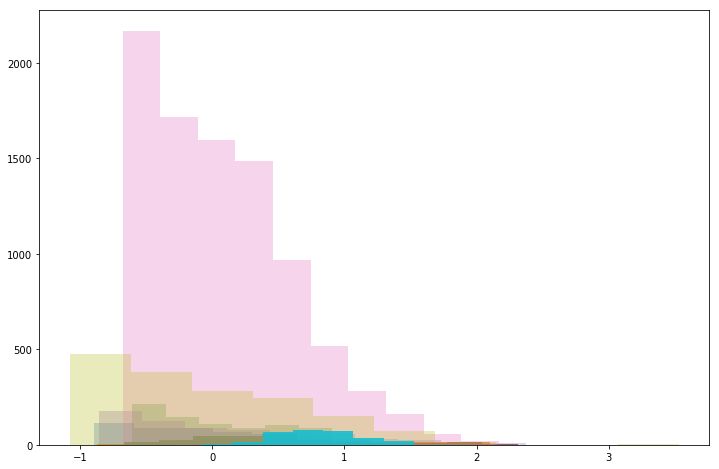

In [4]:
#df_dist = pd.Dataframe(df_seq.groupby('Dir').Dist.median())

fig = plt.figure(figsize=(12,8))
for dirname in df_seq.Dir.unique() :
    #print("Directory: ", dirname)
    df_seq.NormArea = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==0)].area/df_seq[df_seq.Dir==dirname].area.median()
    df_seq.NormArea = np.log(df_seq.NormArea)
    print(dirname, "  No Eagle,  mean: ", round(df_seq.NormArea.mean(), 2), "  std: ", round(df_seq.NormArea.std(), 2))
    #fig = plt.figure()   #figsize=(12,12))
    #ax = plt.subplot(111)
    #ax.set_title(dirname)
    plt.hist(df_seq.NormArea, alpha=0.3)
    df_seq.NormArea = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)].area/df_seq[df_seq.Dir==dirname].area.median()
    df_seq.NormArea = np.log(df_seq.NormArea)
    print(dirname, "  Eagle,  mean: ", round(df_seq.NormArea.mean(), 2), "  std: ", round(df_seq.NormArea.std(), 2))
    plt.hist(df_seq.NormArea, alpha=0.9)    

plt.show()

Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\   No Eagle,  mean:  170.15   median:  179.73   std:  47.73
E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\   Eagle,  mean:  130.66   median:  122.79   std:  30.91
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\   No Eagle,  mean:  137.03   median:  131.02   std:  32.18
E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\   Eagle,  mean:  114.28   median:  104.21   std:  26.34
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\   No Eagle,  mean:  152.04   median:  149.62   std:  39.95
E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\   Eagle,  mean:  109.56   median:  101.75   std:  31.09
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\   No Eagle,  mean:  123.07   median

C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\   No Eagle,  mean:  118.07   median:  120.52   std:  49.14
E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\   Eagle,  mean:  85.75   median:  85.45   std:  14.94


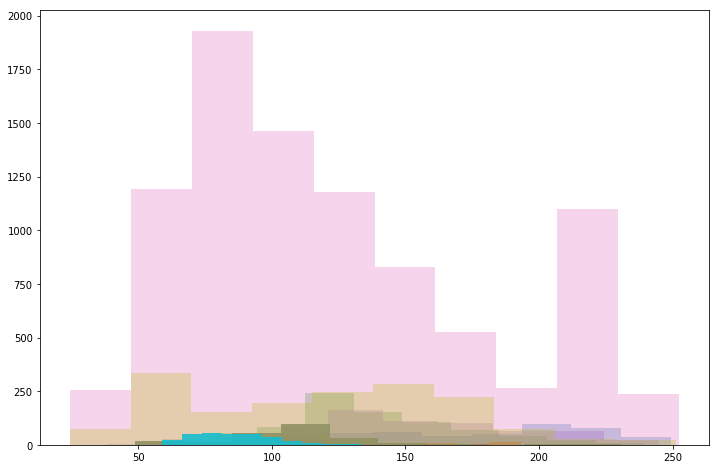

In [5]:
fig = plt.figure(figsize=(12,8))
for dirname in df_seq.Dir.unique() :
    print("Directory: ", dirname)
    df_no_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==0)]
    df_no_eagle.MaxIntensity = np.where(df_no_eagle.mean_intensity1 < df_no_eagle.mean_intensity2, df_no_eagle.mean_intensity2, df_no_eagle.mean_intensity1)
    #print(df_no_eagle.MaxIntensity[0:5])
    print(dirname, "  No Eagle,  mean: ", round(df_no_eagle.MaxIntensity.mean(), 2), "  median: ", round(np.median(df_no_eagle.MaxIntensity), 2), "  std: ", round(df_no_eagle.MaxIntensity.std(), 2))
    plt.hist(df_no_eagle.MaxIntensity, alpha=0.3)
  
    df_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)]
    df_eagle.MaxIntensity = np.where(df_eagle.mean_intensity1 < df_eagle.mean_intensity2, df_eagle.mean_intensity2, df_eagle.mean_intensity1)

    print(dirname, "  Eagle,  mean: ", round(df_eagle.MaxIntensity.mean(), 2), "  median: ", round(np.median(df_eagle.MaxIntensity), 2), "  std: ", round(df_eagle.MaxIntensity.std(), 2))
    plt.hist(df_eagle.MaxIntensity, alpha=0.9)    

plt.show()

Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\   Eagle,  mean:  126.12   median:  114.5   std:  34.62
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\   Eagle,  mean:  95.28   median:  86.94   std:  31.21
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam277_120716_Deer\   Eagle,  mean:  97.03   median:  86.16   std:  35.59
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam279_011817_Deer\   Eagle,  mean:  95.55   median:  94.16   std:  30.98
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\
E:\Trail_Cameras\Utah\2016-2017\Cam74_111116_Deer\   Eagle,  mean:  82.54   median:  82.57   std:  16.21


C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


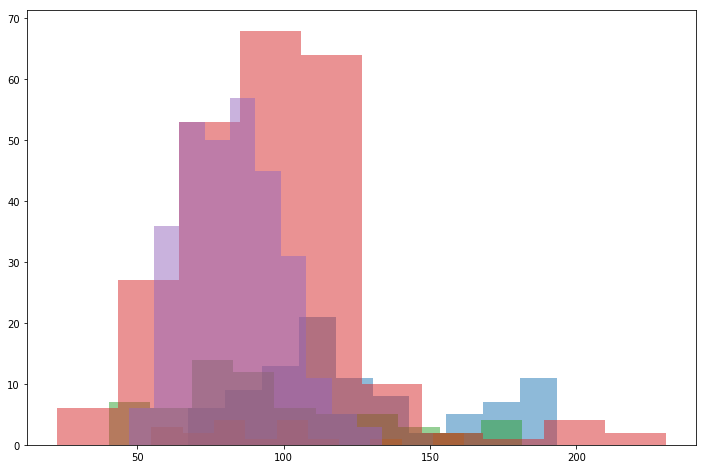

In [6]:
fig = plt.figure(figsize=(12,8))
for dirname in df_seq.Dir.unique() :
    print("Directory: ", dirname)
    df_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)]
    # this isn't exactly right. a few images don't have side = 1 or 2 because there was a problem with the morphology
    df_eagle.MaxIntensity = np.where(df_eagle.Side == 2, df_eagle.mean_intensity2, df_eagle.mean_intensity1)

    print(dirname, "  Eagle,  mean: ", round(df_eagle.MaxIntensity.mean(), 2), "  median: ", round(np.median(df_eagle.MaxIntensity), 2), "  std: ", round(df_eagle.MaxIntensity.std(), 2))
    plt.hist(df_eagle.MaxIntensity, alpha=0.5)    

plt.show()

C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
C:\Users\smith\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


No Eagle correlation between normalized Area and Intensity 
[[1.         0.06501026]
 [0.06501026 1.        ]]
Eagle correlation between normalized Area and Intensity 
[[1.         0.29016064]
 [0.29016064 1.        ]]
No Eagle correlation between normalized Area and Intensity 
[[1.         0.06988457]
 [0.06988457 1.        ]]
Eagle correlation between normalized Area and Intensity 
[[1.        0.1822031]
 [0.1822031 1.       ]]
No Eagle correlation between normalized Area and Intensity 
[[1.         0.10108121]
 [0.10108121 1.        ]]
Eagle correlation between normalized Area and Intensity 
[[1.         0.02527609]
 [0.02527609 1.        ]]
No Eagle correlation between normalized Area and Intensity 
[[1.         0.02188798]
 [0.02188798 1.        ]]
Eagle correlation between normalized Area and Intensity 
[[1.         0.03027818]
 [0.03027818 1.        ]]
No Eagle correlation between normalized Area and Intensity 
[[ 1.        -0.1170196]
 [-0.1170196  1.       ]]
Eagle correlation

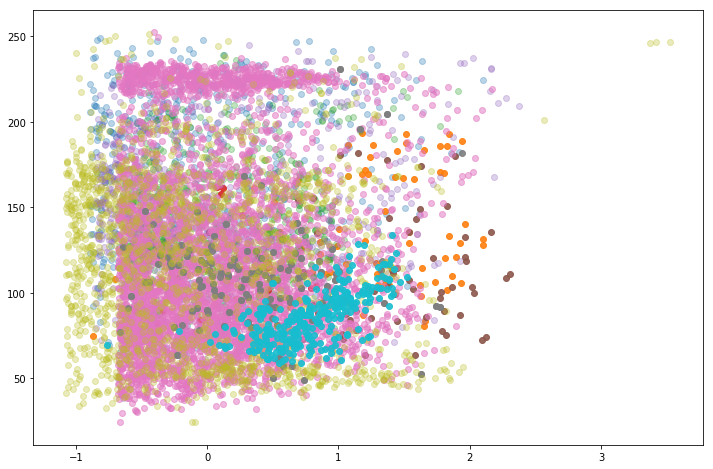

In [7]:
fig = plt.figure(figsize=(12,8))
for dirname in df_seq.Dir.unique() :
    #print("Directory: ", dirname)
    no_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==0)]
    no_eagle.MaxIntensity = np.where(no_eagle.mean_intensity1 < no_eagle.mean_intensity2, no_eagle.mean_intensity2, no_eagle.mean_intensity1)
    
    df_seq.NormArea = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==0)].area/df_seq[df_seq.Dir==dirname].area.median()
    df_seq.NormArea = np.log(df_seq.NormArea)
    #print(dirname, "  No Eagle,  mean: ", round(df_seq.NormArea.mean(), 2), "  std: ", round(df_seq.NormArea.std(), 2))
    plt.scatter(df_seq.NormArea, no_eagle.MaxIntensity, alpha=0.3)
    #print("Types: ", type(no_eagle), type(df_seq.NormArea))
    #print("Lengths: ", len(no_eagle), len(df_seq.NormArea))
    print("No Eagle correlation between normalized Area and Intensity ")
    print(np.corrcoef(no_eagle.MaxIntensity, df_seq.NormArea))

    eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)]
    eagle.MaxIntensity = np.where(eagle.mean_intensity1 < eagle.mean_intensity2, eagle.mean_intensity2, eagle.mean_intensity1)
    
    df_seq.NormArea = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)].area/df_seq[df_seq.Dir==dirname].area.median()
    df_seq.NormArea = np.log(df_seq.NormArea)
    #print(dirname, "  Eagle,  mean: ", round(df_seq.NormArea.mean(), 2), "  std: ", round(df_seq.NormArea.std(), 2))
    plt.scatter(df_seq.NormArea, eagle.MaxIntensity, alpha=0.9)

    print("Eagle correlation between normalized Area and Intensity ")
    print(np.corrcoef(eagle.MaxIntensity, df_seq.NormArea))

plt.show()

In [8]:
for i, row in enumerate(df_seq.itertuples()) :
    #print("Index: ", row.Index)
    if row.NumObj == 0 :
        print("ERROR: should hit a row with no objects")
        continue

    moments_hu = ast.literal_eval(','.join(row.moments_hu.replace("[ ", "[").replace("  ", " ").split()))
    df_seq.loc[row.Index, 'moments_hu_0'] = moments_hu[0]
    df_seq.loc[row.Index, 'moments_hu_1'] = moments_hu[1]
    df_seq.loc[row.Index, 'moments_hu_2'] = moments_hu[2]
    df_seq.loc[row.Index, 'moments_hu_3'] = moments_hu[3]
    df_seq.loc[row.Index, 'moments_hu_4'] = moments_hu[4]
    df_seq.loc[row.Index, 'moments_hu_5'] = moments_hu[5]
    df_seq.loc[row.Index, 'moments_hu_6'] = moments_hu[6]


Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\
0    0.448895
1    0.263314
2    0.433882
3    0.326989
4    1.274026
Name: moments_hu_0, dtype: float64
count:  1   dir:  E:\Trail_Cameras\Utah\2016-2017\Cam272_102716_Deer\
Directory:  E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\
660    0.393037
661    0.632177
662    0.582354
663    0.408144
667    0.439018
Name: moments_hu_0, dtype: float64
count:  2   dir:  E:\Trail_Cameras\Utah\2016-2017\Cam273_111116_Deer\


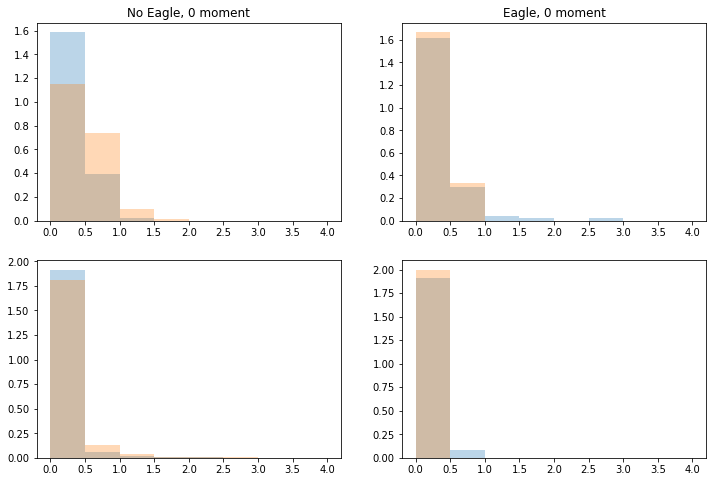

In [10]:
# moments_hu
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
count = 0
for dirname in df_seq.Dir.unique() :
    print("Directory: ", dirname)
    df_no_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==0)] 
    df_eagle = df_seq[(df_seq.Dir==dirname) & (df_seq.EagleLabel==1)]

    bin_list = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
    ax1.hist(df_no_eagle['moments_hu_0'], alpha=0.3, density=True, bins=bin_list)
    print(df_no_eagle.moments_hu_0[0:5])
    ax1.set_title("No Eagle, 0 moment")
    ax2.hist(df_eagle['moments_hu_0'], alpha=0.3, density=True, bins=bin_list)
    ax2.set_title("Eagle, 0 moment")

    ax3.hist(df_no_eagle.moments_hu_1, alpha=0.3, density=True, bins=bin_list)
    ax4.hist(df_eagle.moments_hu_1, alpha=0.3, density=True, bins=bin_list)
    #ax3.hist(df_no_eagle.moments_hu_2, alpha=0.3, density=True, bins=bin_list)
    #ax3.hist(df_eagle.moments_hu_2, alpha=0.3, density=True, bins=bin_list)
    #ax4.hist(df_no_eagle.moments_hu_3, alpha=0.3, density=True, bins=bin_list)
    #ax4.hist(df_eagle.moments_hu_3, alpha=0.3, density=True, bins=bin_list)
    count += 1
    print("count: ", count, "  dir: ", dirname)
    if count == 2 :
        break

plt.show()




In [11]:
fig = plt.figure(figsize=(12,8))
for dirname in df_seq.Dir.unique() :
    #print("Directory: ", dirname)
    #x = df_seq[df_seq.Dir==dirname].Dist/df_seq[df_seq.Dist==dirname].Dist.median()
    df_seq.NormDist = df_seq[df_seq.Dir==dirname].Dist/df_seq[df_seq.Dir==dirname].Dist.median()
    df_seq.NormDist = np.log(df_seq.NormDist)
    print(dirname, "  mean: ", round(df_seq.NormDist.mean(), 2), "  std: ", round(df_seq.NormDist.std(), 2))

    #fig = plt.figure()   #figsize=(12,12))
    #ax = plt.subplot(111)
    #ax.set_title(dirname)
    plt.hist(df_seq.NormDist, alpha=0.3)
    
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Dist'

In [ ]:

data = []
tickname = []
for dirname in df_seq.Dir.unique() :
    #print("Directory: ", dirname)
    tickname.append(dirname)
    data.append(np.log(df_seq[df_seq.Dir==dirname].Size/df_seq[df_seq.Dir==dirname].Size.median()))

    #data.append(df_seq[df_seq.Dir==dirname].NormSize)
    

ticknum = list(range(1,len(tickname)))
print(ticknum)
# horizontal boxes
plt.figure(figsize=(12,8))
plt.boxplot(data, vert=False)
plt.yticks(ticknum, tickname)
plt.show()